Предполагается, что в рамках данного задания ученики сами будут изучать документацию, как минимум используя функционал `tab` и `shift+tab` от Jupyter

1. Импортируйте библиотеку pandas 
2. Считайте файл `wage.csv` в DataFrame с названием `wage`. Используйте для этого функцию pd.read_csv()

`person_id` - идентификатор человека

`gender` - пол, 0 - женский, 1 - мужской

`wage` - заработная плата в рублях

In [1]:
import pandas as pd

In [2]:
wage = pd.read_csv('wage.csv')

3. Поменяйте колонку `gender` так, чтобы были записи `F` (female) и `M` (male) вместо 0 и 1

In [3]:
wage.gender = wage.gender.replace({0:'F', 1:'M'})

4. Давайте посчитаем среднюю зарплату у мужчин и женщин. Для этого используйте метод `groupby` со следующим синтаксисом:

`dataframe.groupby(Название_колонки_для_группировки)[Перечисление_колонок_для_агрегации].функция_агрегации()`

In [4]:
wage.groupby('gender')['wage'].mean()

gender
F    40855.747261
M    46815.944005
Name: wage, dtype: float64

5. Теперь взглянем внимательнее на данные и обнаружим, что некоторые люди попали в выборку несколько раз. 
    1. Найдите таких людей. Подсказка: `value_counts()`
    0. Убедитесь, что записи по ним с одинаковым `wage`. Возможно, тут вам пригодится функция агрегации `nunique()`, отображающая количество разных значений
    0. Избавьтесь от повторяющихся значений. Подсказка: `drop_duplicates()`

In [5]:
wage = wage.drop_duplicates()
wage.value_counts()

person_id  gender  wage         
0          M       46793.603811     1
671        F       10248.867587     1
658        F       19783.977951     1
659        F       10461.600089     1
660        M       65520.795238     1
                                   ..
338        F       24467.660296     1
339        M       19057.252451     1
340        F       69126.349194     1
341        F       25954.347353     1
999        M       108107.141368    1
Name: count, Length: 1000, dtype: int64

6. Теперь посмотрим внимательнее на зарплаты
    1. Охарактеризуйте имеющиеся данные по зарплатам. Подсказка: `describe`
    1. Избавьтесь от бессмысленных значений

In [6]:
wage.describe()

,person_id,wage
count,1000.000000,1000.000000
mean,499.500000,43694.227404
std,288.819436,55352.539343
min,0.000000,-287418.645743
25%,249.750000,14489.682367
50%,499.500000,27309.529498
75%,749.250000,52021.080258
max,999.000000,755320.874132


In [7]:
wage.loc[wage.wage < 0, 'wage'] = 0
wage = wage.dropna(subset=['wage'])

In [8]:
wage.wage.describe()

count      1000.000000
mean      44085.434737
std       54256.300575
min           0.000000
25%       14489.682367
50%       27309.529498
75%       52021.080258
max      755320.874132
Name: wage, dtype: float64

<Axes: ylabel='Frequency'>

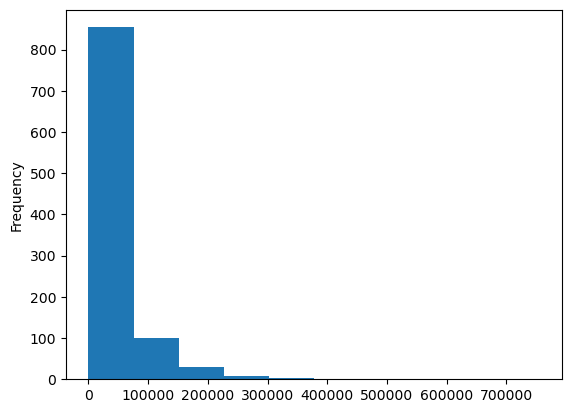

In [9]:
wage['wage'].plot(kind='hist')

7. Давайте теперь посмотрим на зарплату с учетом бонуса. Для этого нам понадобится таблица `bonus.csv`. Считайте ее в переменную `bonus`. Заметьте, что она сохранена немного в другом формате, и вам понадобится уточнить параметр `sep` - разделитель записей. Сравните текущий файл с предыдущим и попробуйте решить проблему

In [10]:
bonus = pd.read_csv('bonus.csv', sep=';')
bonus

,person_id,bonus
0,905,85059.638382
1,836,7703.346074
2,287,3120.269742
3,548,5347.987142
4,575,137257.490614
...,...,...
445,488,28102.252903
446,913,55549.347647
447,616,620397.407705
448,110,14086.067488


8. Чтобы посчитать итоговую зарплату, нам нужно по каждому человеку знать и оклад, и премию. Для этого надо будет соединить (сджойнить) таблицы по `person_id`. Используйте для этого функцию `pd.merge`. Помните, что параметр `how` должен быть `'outer'`, чтобы сохранить те записи, что есть только в одной таблице. Результат запишите в новый dataframe `df`

In [11]:
df = pd.merge(wage, bonus, on='person_id', how='outer')
df.bonus[848]

nan

9. Наконец, давайте посчитаем итоговую зарплату
    1. Замените отсутствующие записи в колонке `bonus` нулями
    1. Уберите людей без `wage` - это те "плохие" записи, от которых мы избавлялись на предыдущих шагах
    1. Сделайте новую колонку `total`, которая будет равна 12 окладам и премии
    1. Посчитайте среднюю и медианную итоговую зарплату в разрезе по полу. Подсказка: вместо функции агрегации можно написать `.agg()` и перечислить внутри нужные агрегаты

In [12]:
df = df.fillna(0)
df.head(5)

,person_id,gender,wage,bonus
0,0,M,46793.603811,3.332934e+04
1,1,M,33481.575720,0.000000e+00
2,2,M,44523.699084,3.192912e+06
3,3,M,15995.576829,2.196858e+04
4,4,F,10282.631224,0.000000e+00


In [13]:
df['total'] = 12 * df['wage'] + df['bonus']
df.head(5)

,person_id,gender,wage,bonus,total
0,0,M,46793.603811,3.332934e+04,5.948526e+05
1,1,M,33481.575720,0.000000e+00,4.017789e+05
2,2,M,44523.699084,3.192912e+06,3.727197e+06
3,3,M,15995.576829,2.196858e+04,2.139155e+05
4,4,F,10282.631224,0.000000e+00,1.233916e+05


In [14]:
df.groupby('gender').agg({'total':['mean','median']})

total               
                 mean         median
gender                              
F       566685.240000  346233.018846
M       655877.574738  435581.404242

10. Сохраните `df` в файл, используя метод `to_csv()`. Не записывайте индексы

In [15]:
df.to_csv('total_wage.csv', index = False)